<a href="https://colab.research.google.com/github/palakagl/NLP/blob/main/Wysdom_ShallowModel_TFIDF_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install unidecode

     |████████████████████████████████| 235 kB 3.9 MB/s 


In [15]:
import pandas as pd
import io
import re
import nltk
#import unidecode
from nltk.corpus import stopwords  
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import itertools
from xgboost import XGBClassifier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
from google.colab import files
uploaded = files.upload()

Saving personal_assistant_train.csv to personal_assistant_train.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['personal_assistant_train.csv']))

In [5]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8884 entries, 0 to 8883
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       8884 non-null   int64 
 1   message  8884 non-null   object
 2   label    8884 non-null   object
dtypes: int64(1), object(2)
memory usage: 208.3+ KB
None
      id                                            message             label
0  10480                           start the robotic vacuum      iot_cleaning
1   4210          i am sorry but i think you are not right.    general_negate
2   2443  what is the time difference between california...  datetime_convert
3   5869                              tell me my list names       lists_query
4   2801                 beep when i get an email from john       email_query


In [ ]:
stop_words = stopwords.words('english') 
lemmer = WordNetLemmatizer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()

    # Lower case
    x = x.lower()
    
    # Remove punctuation
    x = re.sub(r'[^\w\s]', '', x)
    
    # Remove non-unicode
    x = unidecode.unidecode(x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x) 

%time df['message_clean'] = df['message'].apply(preprocess)
df.head(15)

CPU times: user 6.01 s, sys: 318 ms, total: 6.33 s
Wall time: 9.95 s


,id,message,label,message_clean
0,10480,start the robotic vacuum,iot_cleaning,start robotic vacuum
1,4210,i am sorry but i think you are not right.,general_negate,sorry think right
2,2443,what is the time difference between california...,datetime_convert,time difference california new york
3,5869,tell me my list names,lists_query,tell list name
4,2801,beep when i get an email from john,email_query,beep get email john
5,7384,find me the local npr station,play_radio,find local npr station
6,3244,yes answer was confirmed.,general_affirm,yes answer confirmed
7,3247,answer is confirmed.,general_affirm,answer confirmed
8,5220,i would love a less bright up room,iot_hue_lightdim,would love le bright room
9,6400,i've heard this riff before what song stole th...,music_query,ive heard riff song stole riff exactly


In [ ]:
'''
s = df.message
for i in range(len(s)):
  #Removes anything thats not word or number
  s[i] = re.sub(r'\W',' ',s[i])
  #Remove single alphabets
  s[i] = re.sub(r'\s+[a-zA-Z]\s+',' ',s[i])
  #Remove digits
  s[i] = re.sub(r'\d',' ',s[i])
  #Remove space from first character
  s[i] = re.sub(r'^\s',' ',s[i])
  #Remove space from last character
  s[i] = re.sub(r'\s$',' ',s[i])
  #Remove extra spaces
  s[i] = re.sub(r'\s+',' ',s[i])

df.head(10)
'''

In [6]:
#X = df['message_clean']
X = df['message']
y = df['label']

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(7107,)
(7107,)
(1777,)
(1777,)


In [ ]:
'''
# Creating the BOW model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()


# Creating the Tf-Idf Model
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X = transformer.fit_transform(X).toarray()
'''

In [8]:
#vectorizer = CountVectorizer(min_df=.01, max_df=.8, ngram_range=[1,4], max_features=550)
vectorizer = TfidfVectorizer()
#vectorizer = TfidfVectorizer(max_features = 500, ngram_range=[1,3], min_df = .01, max_df = 0.8)
pipe = Pipeline([('vec', vectorizer),  ('clf', RandomForestClassifier(random_state=223))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vec', TfidfVectorizer()),
                ('clf', RandomForestClassifier(random_state=223))])

In [9]:
pred_val = pipe.predict(X_val)
print(confusion_matrix(y_val, pred_val))
print(classification_report(y_val, pred_val))

[[23  1  5 ...  0  0  0]
 [ 5 15  3 ...  0  0  0]
 [ 2  1 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  1 ...  0  0 26]]
                          precision    recall  f1-score   support

             alarm_query       0.77      0.79      0.78        29
            alarm_remove       0.83      0.65      0.73        23
               alarm_set       0.68      0.72      0.70        29
       audio_volume_down       0.69      0.75      0.72        12
       audio_volume_mute       0.74      0.61      0.67        23
         audio_volume_up       0.86      0.79      0.83        24
          calendar_query       0.81      0.42      0.55        31
         calendar_remove       0.70      0.97      0.81        31
            calendar_set       0.85      0.65      0.73        34
          cooking_recipe       0.72      0.66      0.69        35
        datetime_convert       0.86      0.92      0.89        13
          datetime_query       0.76      0.93      

In [10]:
ari = adjusted_rand_score(y_val, pred_val)
ami = adjusted_mutual_info_score(y_val, pred_val, average_method='arithmetic')

print("ARI: {}".format(ari))
print("AMI: {}".format(ami))

ARI: 0.6855153393949913
AMI: 0.7810267958289897


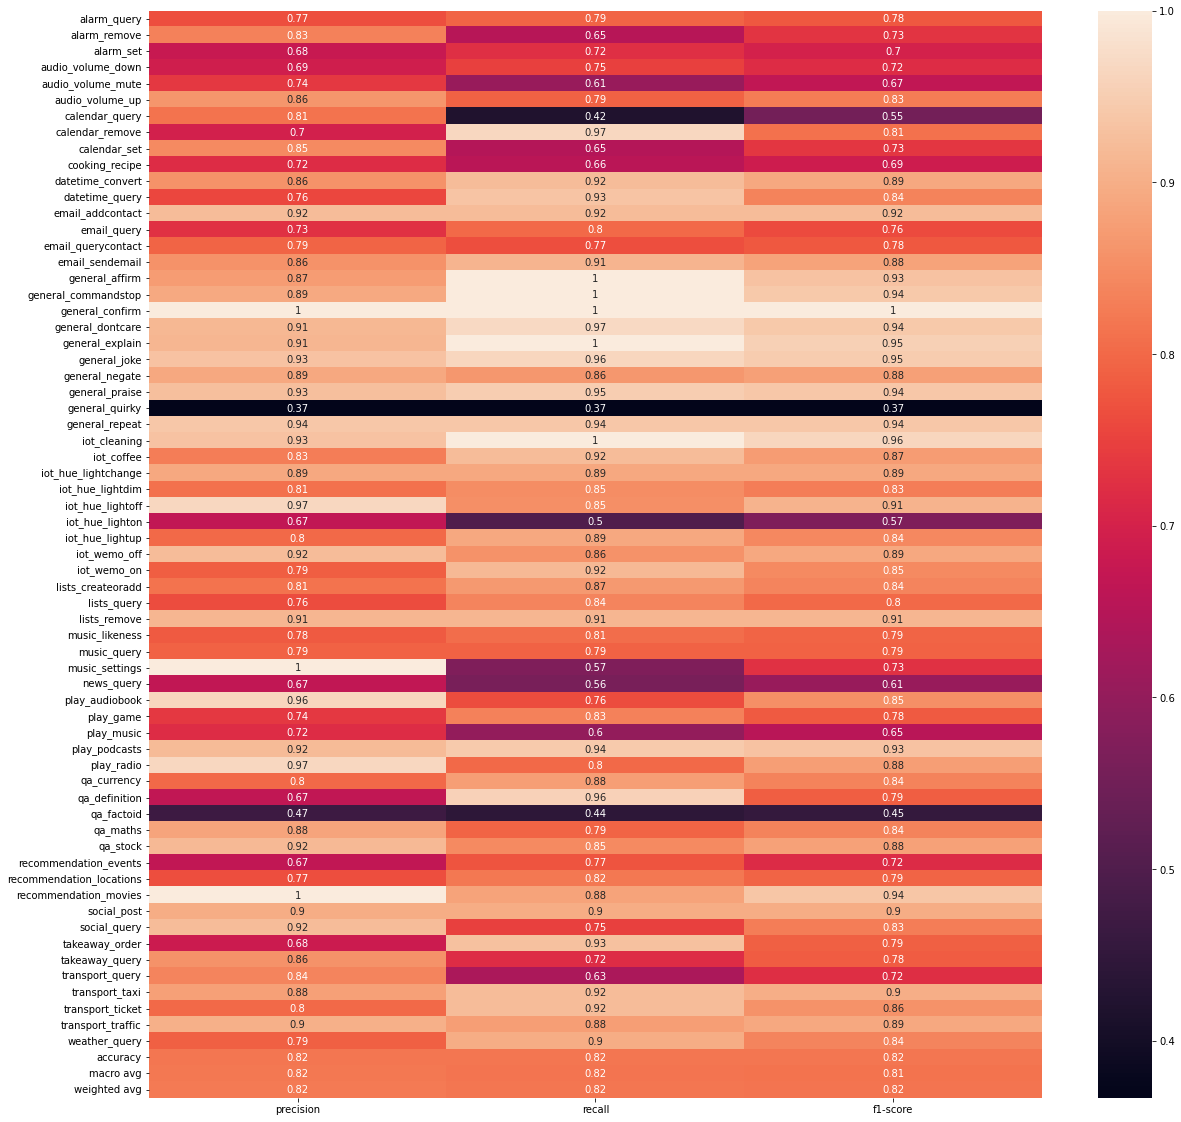

In [13]:
def visualize_classification_report_with_heatmap(test_y, pred_labels, target_names_dict):
  fig, ax = plt.subplots(figsize=(20,20)) 
  clf_report = classification_report(test_y, pred_labels,
                                    target_names=list(target_names_dict.values()),
                                    output_dict=True)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
  return

# Use this dict, if cannot generate from labeled data based dictionary ('label_dict') dynamically
label_dict_fixed={0: 'alarm_query',1: 'alarm_remove',2: 'alarm_set',3: 'audio_volume_down',4: 'audio_volume_mute',5: 'audio_volume_up',6: 'calendar_query',7: 'calendar_remove',8: 'calendar_set',9: 
             'cooking_recipe',10: 'datetime_convert',11: 'datetime_query',12: 'email_addcontact',13: 'email_query',14: 'email_querycontact',15: 'email_sendemail',16: 'general_affirm',17: 'general_commandstop',
             18: 'general_confirm',19: 'general_dontcare',20: 'general_explain',21: 'general_joke',22: 'general_negate',23: 'general_praise',24: 'general_quirky',25: 'general_repeat',26: 'iot_cleaning',
             27: 'iot_coffee',28: 'iot_hue_lightchange',29: 'iot_hue_lightdim',30: 'iot_hue_lightoff',31: 'iot_hue_lighton',32: 'iot_hue_lightup',33: 'iot_wemo_off',34: 'iot_wemo_on',35: 'lists_createoradd',
             36: 'lists_query',37: 'lists_remove',38: 'music_likeness',39: 'music_query',40: 'music_settings',41: 'news_query',42: 'play_audiobook',43: 'play_game',44: 'play_music',45: 'play_podcasts',
             46: 'play_radio',47: 'qa_currency',48: 'qa_definition',49: 'qa_factoid',50: 'qa_maths',51: 'qa_stock',52: 'recommendation_events',53: 'recommendation_locations',54: 'recommendation_movies',
             55: 'social_post',56: 'social_query',57: 'takeaway_order',58: 'takeaway_query',59: 'transport_query',60: 'transport_taxi',61: 'transport_ticket',62: 'transport_traffic',63: 'weather_query'}

visualize_classification_report_with_heatmap(y_val, pred_val, label_dict_fixed)

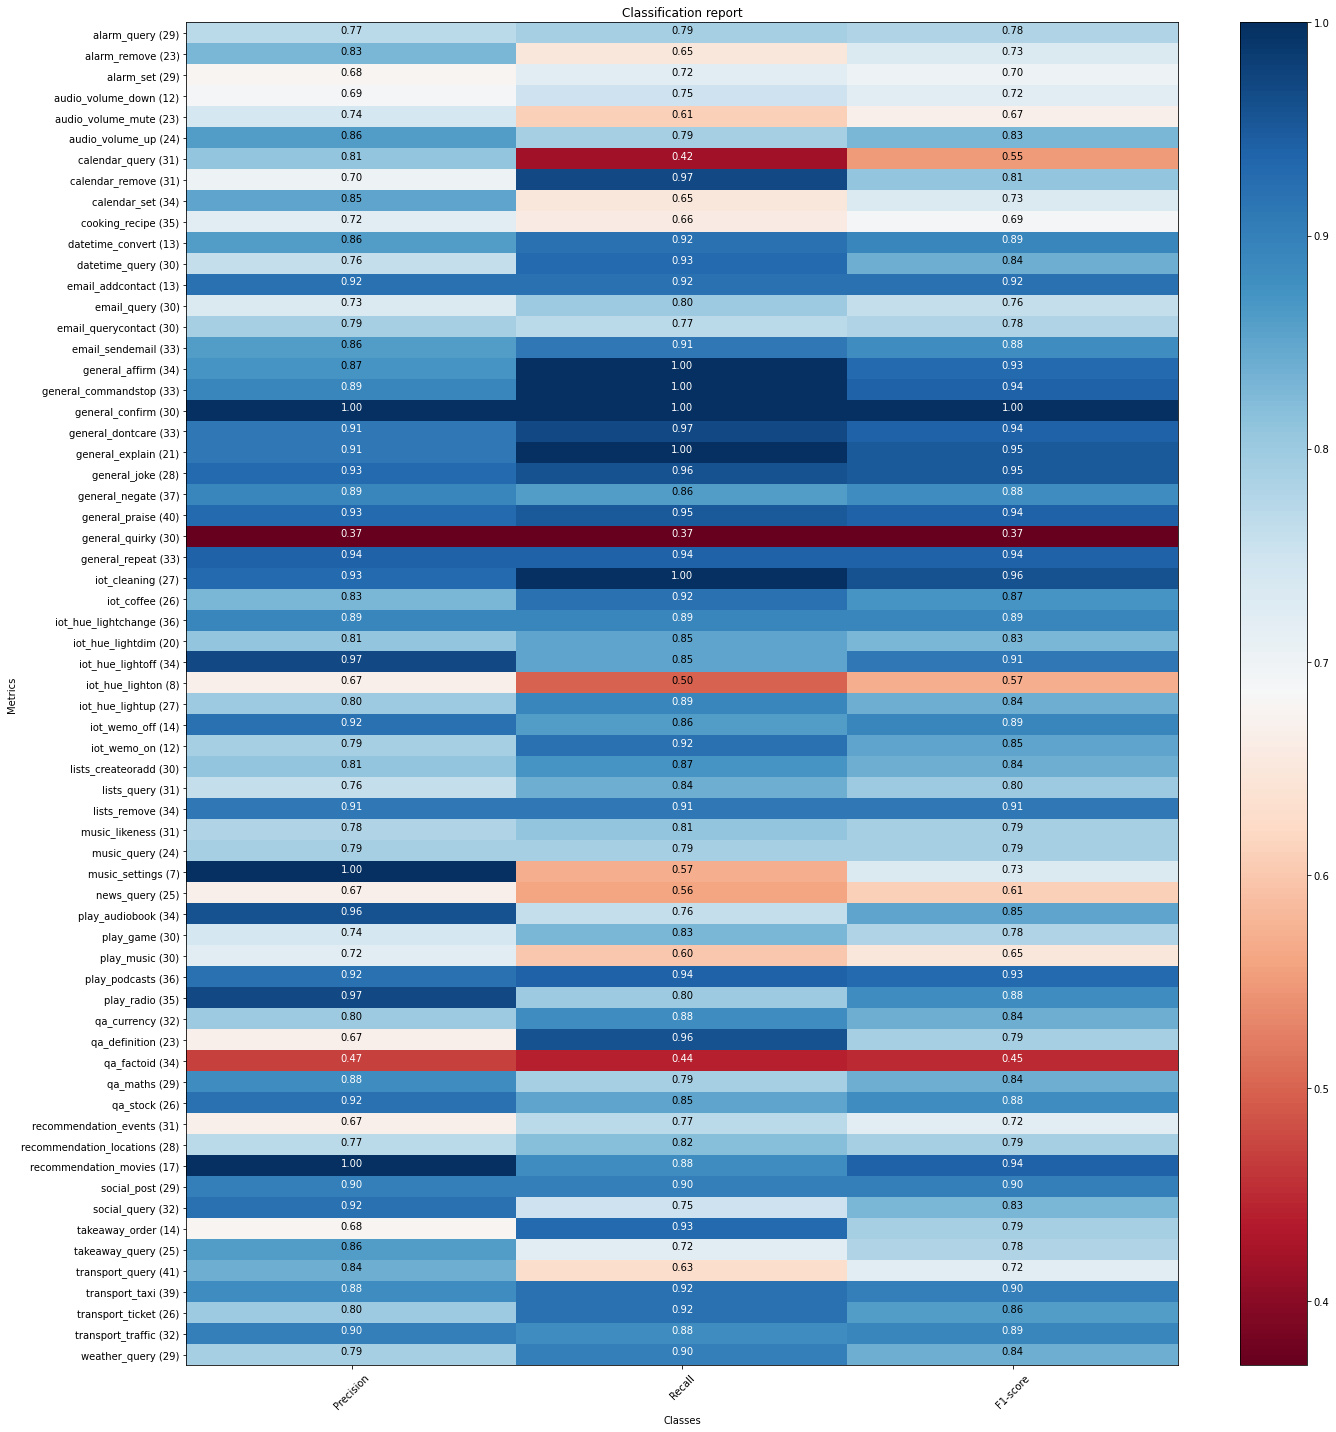

In [14]:
def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace('macro avg', 'macro_avg')
    classificationReport = classificationReport.replace('weighted avg', 'weighted_avg')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:-4]:  # if you don't want any avg, then change [1:] into [1:-4]
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)]
    fig, ax = plt.subplots(figsize=(20,20)) 
    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)

    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")

    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.tight_layout()

# Use this dict, if cannot generate from labeled data based dictionary ('label_dict') dynamically
label_dict_fixed={0: 'alarm_query',1: 'alarm_remove',2: 'alarm_set',3: 'audio_volume_down',4: 'audio_volume_mute',5: 'audio_volume_up',6: 'calendar_query',7: 'calendar_remove',8: 'calendar_set',9: 
             'cooking_recipe',10: 'datetime_convert',11: 'datetime_query',12: 'email_addcontact',13: 'email_query',14: 'email_querycontact',15: 'email_sendemail',16: 'general_affirm',17: 'general_commandstop',
             18: 'general_confirm',19: 'general_dontcare',20: 'general_explain',21: 'general_joke',22: 'general_negate',23: 'general_praise',24: 'general_quirky',25: 'general_repeat',26: 'iot_cleaning',
             27: 'iot_coffee',28: 'iot_hue_lightchange',29: 'iot_hue_lightdim',30: 'iot_hue_lightoff',31: 'iot_hue_lighton',32: 'iot_hue_lightup',33: 'iot_wemo_off',34: 'iot_wemo_on',35: 'lists_createoradd',
             36: 'lists_query',37: 'lists_remove',38: 'music_likeness',39: 'music_query',40: 'music_settings',41: 'news_query',42: 'play_audiobook',43: 'play_game',44: 'play_music',45: 'play_podcasts',
             46: 'play_radio',47: 'qa_currency',48: 'qa_definition',49: 'qa_factoid',50: 'qa_maths',51: 'qa_stock',52: 'recommendation_events',53: 'recommendation_locations',54: 'recommendation_movies',
             55: 'social_post',56: 'social_query',57: 'takeaway_order',58: 'takeaway_query',59: 'transport_query',60: 'transport_taxi',61: 'transport_ticket',62: 'transport_traffic',63: 'weather_query'}

classificationReport = classification_report(y_val, pred_val, target_names = list(label_dict_fixed.values()))

plot_classification_report(classificationReport)

In [16]:
#vectorizer = CountVectorizer(min_df=.01, max_df=.8, ngram_range=[1,4], max_features=550)
vectorizer = TfidfVectorizer()
#vectorizer = TfidfVectorizer(max_features = 500, ngram_range=[1,3], min_df = .01, max_df = 0.8)
pipe = Pipeline([('vec', vectorizer),  ('clf', XGBClassifier(random_state=223))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vec', TfidfVectorizer()),
                ('clf',
                 XGBClassifier(objective='multi:softprob', random_state=223))])

In [17]:
pred_val = pipe.predict(X_val)
print(confusion_matrix(y_val, pred_val))
print(classification_report(y_val, pred_val))

[[20  3  5 ...  0  0  0]
 [ 8 11  4 ...  0  0  0]
 [ 3  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ... 25  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 26]]
                          precision    recall  f1-score   support

             alarm_query       0.65      0.69      0.67        29
            alarm_remove       0.79      0.48      0.59        23
               alarm_set       0.69      0.69      0.69        29
       audio_volume_down       0.82      0.75      0.78        12
       audio_volume_mute       0.67      0.61      0.64        23
         audio_volume_up       0.82      0.75      0.78        24
          calendar_query       0.70      0.52      0.59        31
         calendar_remove       0.72      0.94      0.82        31
            calendar_set       0.76      0.56      0.64        34
          cooking_recipe       0.62      0.57      0.60        35
        datetime_convert       0.83      0.77      0.80        13
          datetime_query       0.75      0.90      

In [18]:
ari = adjusted_rand_score(y_val, pred_val)
ami = adjusted_mutual_info_score(y_val, pred_val, average_method='arithmetic')

print("ARI: {}".format(ari))
print("AMI: {}".format(ami))

ARI: 0.6422334620908994
AMI: 0.7528694723244551


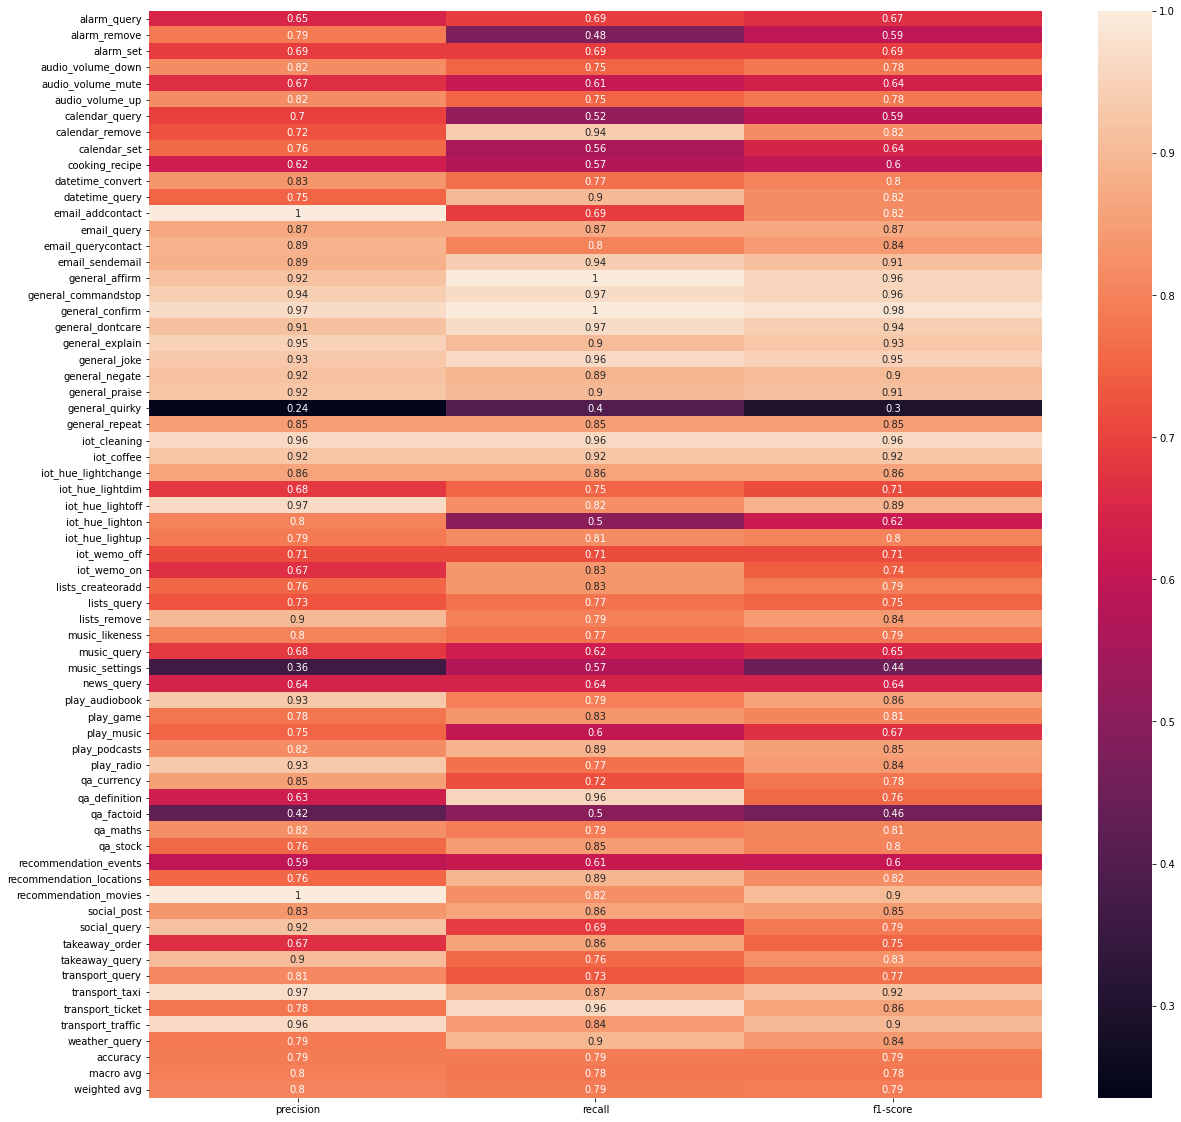

In [20]:
def visualize_classification_report_with_heatmap(test_y, pred_labels, target_names_dict):
  fig, ax = plt.subplots(figsize=(20,20)) 
  clf_report = classification_report(test_y, pred_labels,
                                    target_names=list(target_names_dict.values()),
                                    output_dict=True)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
  return

# Use this dict, if cannot generate from labeled data based dictionary ('label_dict') dynamically
label_dict_fixed={0: 'alarm_query',1: 'alarm_remove',2: 'alarm_set',3: 'audio_volume_down',4: 'audio_volume_mute',5: 'audio_volume_up',6: 'calendar_query',7: 'calendar_remove',8: 'calendar_set',9: 
             'cooking_recipe',10: 'datetime_convert',11: 'datetime_query',12: 'email_addcontact',13: 'email_query',14: 'email_querycontact',15: 'email_sendemail',16: 'general_affirm',17: 'general_commandstop',
             18: 'general_confirm',19: 'general_dontcare',20: 'general_explain',21: 'general_joke',22: 'general_negate',23: 'general_praise',24: 'general_quirky',25: 'general_repeat',26: 'iot_cleaning',
             27: 'iot_coffee',28: 'iot_hue_lightchange',29: 'iot_hue_lightdim',30: 'iot_hue_lightoff',31: 'iot_hue_lighton',32: 'iot_hue_lightup',33: 'iot_wemo_off',34: 'iot_wemo_on',35: 'lists_createoradd',
             36: 'lists_query',37: 'lists_remove',38: 'music_likeness',39: 'music_query',40: 'music_settings',41: 'news_query',42: 'play_audiobook',43: 'play_game',44: 'play_music',45: 'play_podcasts',
             46: 'play_radio',47: 'qa_currency',48: 'qa_definition',49: 'qa_factoid',50: 'qa_maths',51: 'qa_stock',52: 'recommendation_events',53: 'recommendation_locations',54: 'recommendation_movies',
             55: 'social_post',56: 'social_query',57: 'takeaway_order',58: 'takeaway_query',59: 'transport_query',60: 'transport_taxi',61: 'transport_ticket',62: 'transport_traffic',63: 'weather_query'}

visualize_classification_report_with_heatmap(y_val, pred_val, label_dict_fixed)

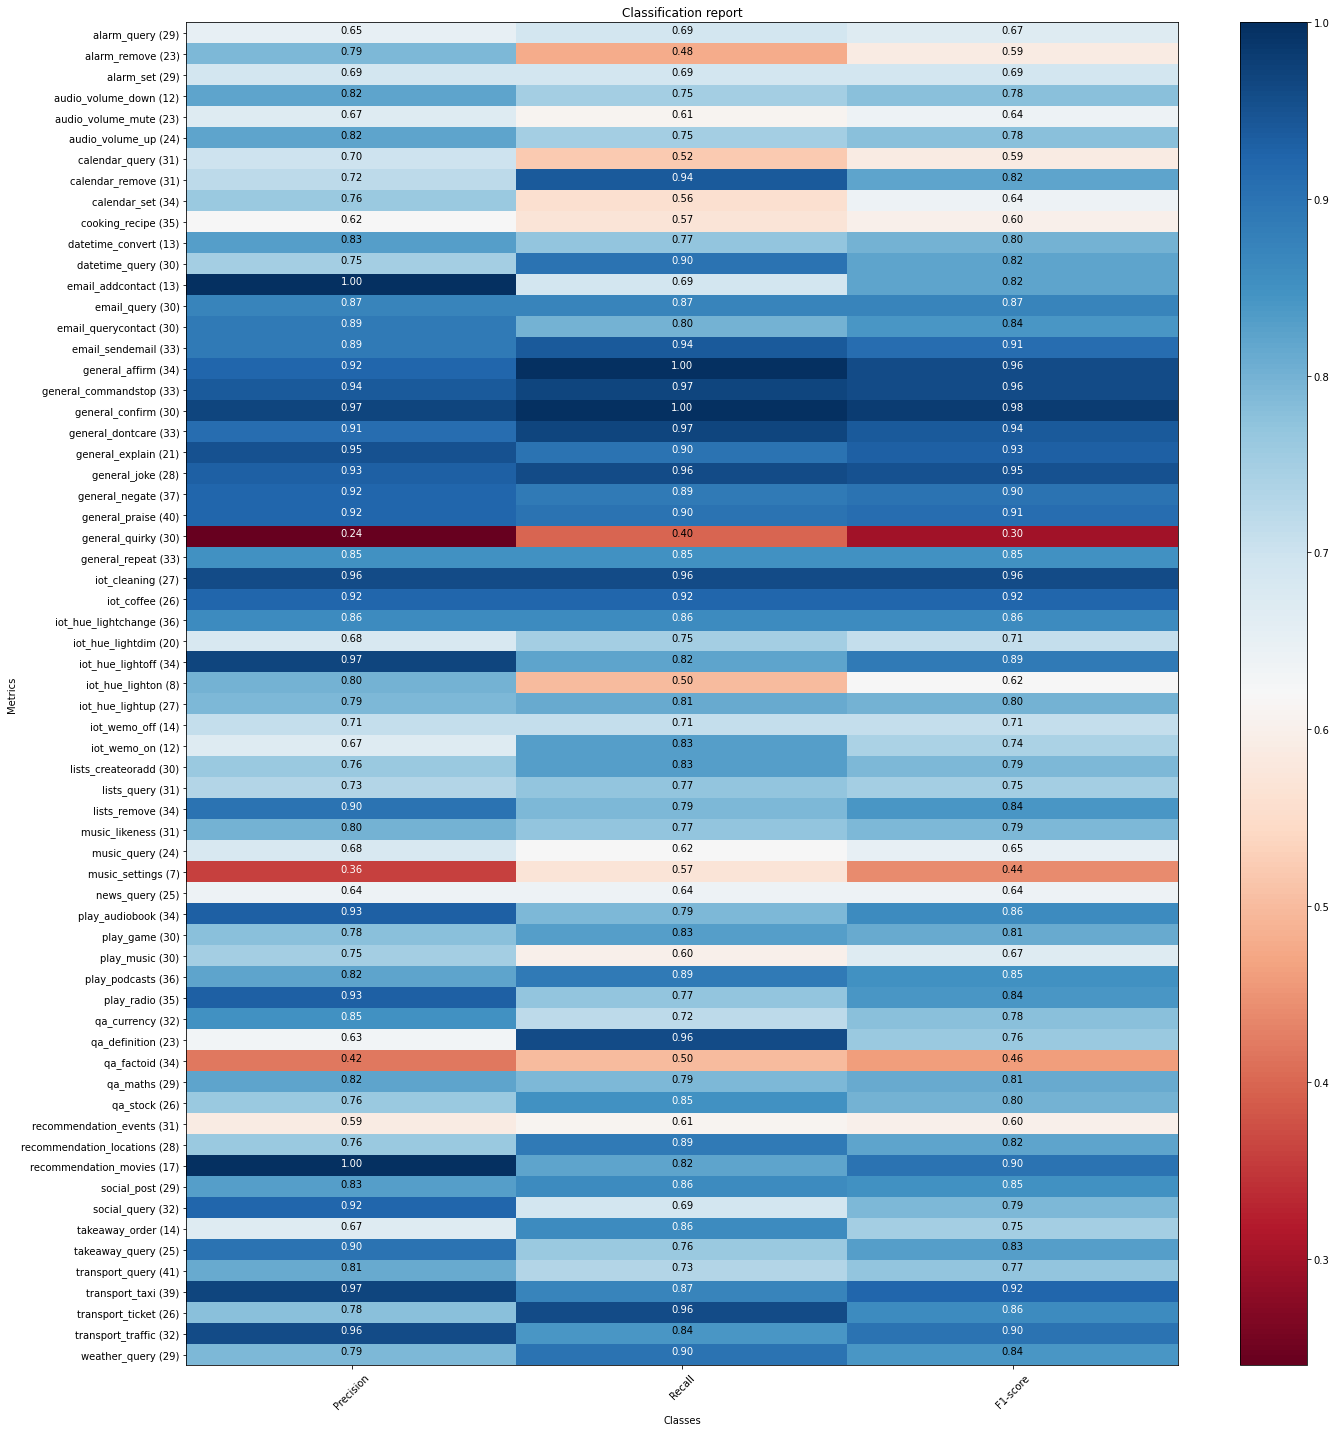

In [21]:
def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace('macro avg', 'macro_avg')
    classificationReport = classificationReport.replace('weighted avg', 'weighted_avg')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:-4]:  # if you don't want any avg, then change [1:] into [1:-4]
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)]
    fig, ax = plt.subplots(figsize=(20,20)) 
    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)

    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")

    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.tight_layout()

# Use this dict, if cannot generate from labeled data based dictionary ('label_dict') dynamically
label_dict_fixed={0: 'alarm_query',1: 'alarm_remove',2: 'alarm_set',3: 'audio_volume_down',4: 'audio_volume_mute',5: 'audio_volume_up',6: 'calendar_query',7: 'calendar_remove',8: 'calendar_set',9: 
             'cooking_recipe',10: 'datetime_convert',11: 'datetime_query',12: 'email_addcontact',13: 'email_query',14: 'email_querycontact',15: 'email_sendemail',16: 'general_affirm',17: 'general_commandstop',
             18: 'general_confirm',19: 'general_dontcare',20: 'general_explain',21: 'general_joke',22: 'general_negate',23: 'general_praise',24: 'general_quirky',25: 'general_repeat',26: 'iot_cleaning',
             27: 'iot_coffee',28: 'iot_hue_lightchange',29: 'iot_hue_lightdim',30: 'iot_hue_lightoff',31: 'iot_hue_lighton',32: 'iot_hue_lightup',33: 'iot_wemo_off',34: 'iot_wemo_on',35: 'lists_createoradd',
             36: 'lists_query',37: 'lists_remove',38: 'music_likeness',39: 'music_query',40: 'music_settings',41: 'news_query',42: 'play_audiobook',43: 'play_game',44: 'play_music',45: 'play_podcasts',
             46: 'play_radio',47: 'qa_currency',48: 'qa_definition',49: 'qa_factoid',50: 'qa_maths',51: 'qa_stock',52: 'recommendation_events',53: 'recommendation_locations',54: 'recommendation_movies',
             55: 'social_post',56: 'social_query',57: 'takeaway_order',58: 'takeaway_query',59: 'transport_query',60: 'transport_taxi',61: 'transport_ticket',62: 'transport_traffic',63: 'weather_query'}

classificationReport = classification_report(y_val, pred_val, target_names = list(label_dict_fixed.values()))

plot_classification_report(classificationReport)

## Kaggle Predictions

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving personal_assistant_test.csv to personal_assistant_test.csv


In [ ]:
df_test = pd.read_csv(io.BytesIO(uploaded['personal_assistant_test.csv']))

In [ ]:
#df_test = pd.read_csv('input_data.csv')
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2221 non-null   int64 
 1   message  2221 non-null   object
dtypes: int64(1), object(1)
memory usage: 34.8+ KB


,id,message
0,10873,list the current price of microsoft shares
1,8491,where is the nearest smoke shop
2,4549,please start over.
3,5948,read my lists to me
4,1663,mute volume now


In [ ]:
%time df_test['message_clean'] = df_test['message'].apply(preprocess)

CPU times: user 1.08 s, sys: 39.2 ms, total: 1.12 s
Wall time: 2.4 s


In [ ]:
pred_test = pipe.predict(df_test['message_clean'])
pred_test

array(['qa_stock', 'recommendation_locations', 'general_repeat', ...,
       'iot_hue_lightoff', 'email_query', 'general_quirky'], dtype=object)

In [ ]:

my_submission = pd.DataFrame({'Id': df_test['id'], 'label': pred_test})
print(my_submission.head())

      Id                     label
0  10873                  qa_stock
1   8491  recommendation_locations
2   4549            general_repeat
3   5948               lists_query
4   1663         audio_volume_mute


In [ ]:
# NOTE: after saving the CSV file, be sure to zip the file before submitting to the competition website!
my_submission.to_csv('Answers_RF_TFIDF.csv', index=False)